# Data Exploration

In [1]:
%pip install -U pandas numpy matplotlib seaborn datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datasets import load_dataset

/opt/homebrew/anaconda3/envs/adl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Main Exploration

### Data Loading

In [4]:
raw_dataset = load_dataset("zhengyun21/PMC-Patients")

/opt/homebrew/anaconda3/envs/adl/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [5]:
raw_dataset.keys()

dict_keys(['train'])

In [6]:
raw_dataset = raw_dataset['train']

In [7]:
raw_df = raw_dataset.to_pandas()

### Inspection

We start off by looking at basic information about the data, such as the number of rows and columns, the data types of the columns, and the number of null values in each column.

In [8]:
raw_df.head()

,patient_id,patient_uid,PMID,file_path,title,patient,age,gender,relevant_articles,similar_patients
0,0,7665777-1,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 60-year-old male was hospitalized due to ...,"[[60.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-2': 2, '7665777-3': 2, '7665777-4': ..."
1,1,7665777-2,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,A 39-year-old man was hospitalized due to an i...,"[[39.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-3': 2, '7665777-4': ..."
2,2,7665777-3,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,One week after a positive COVID-19 result this...,"[[57.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-4': ..."
3,3,7665777-4,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 69-year-old male was admitted to the ICU ...,"[[69.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-3': ..."
4,4,7665777-5,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 57-year-old male was admitted to the ICU ...,"[[57.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-3': ..."


In [9]:
def inspect(df_):

    print(
        f"The dataset contains: \n\t--> {df_.shape[0]} rows \n\t--> {df_.shape[1]} columns."    
    )

    print(
        f"The columns are: \n\t--> {df_.columns.to_list()}\n"
    )

    print(
        df_.info()
    )

    for col_name in df_.columns.to_list():
        # get the top-3 most frequent values
        top_3 = df_[col_name].value_counts().head(3)
        # cut of for easier readings
        top_3 = top_3.apply(lambda x: str(x)[:50])

        print(f"Column: {col_name}")
        print(f"Top-3 values:\n{top_3}\n")



We start of by doing a general inspection using the function from above:

In [10]:
raw_df.head()

,patient_id,patient_uid,PMID,file_path,title,patient,age,gender,relevant_articles,similar_patients
0,0,7665777-1,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 60-year-old male was hospitalized due to ...,"[[60.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-2': 2, '7665777-3': 2, '7665777-4': ..."
1,1,7665777-2,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,A 39-year-old man was hospitalized due to an i...,"[[39.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-3': 2, '7665777-4': ..."
2,2,7665777-3,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,One week after a positive COVID-19 result this...,"[[57.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-4': ..."
3,3,7665777-4,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 69-year-old male was admitted to the ICU ...,"[[69.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-3': ..."
4,4,7665777-5,33492400,comm/PMC007xxxxxx/PMC7665777.xml,Early Physical Therapist Interventions for Pat...,This 57-year-old male was admitted to the ICU ...,"[[57.0, 'year']]",M,"{'32320506': 1, '32293716': 1, '23219649': 1, ...","{'7665777-1': 2, '7665777-2': 2, '7665777-3': ..."


In [11]:
inspect(raw_df)

The dataset contains: 
	--> 167034 rows 
	--> 10 columns.
The columns are: 
	--> ['patient_id', 'patient_uid', 'PMID', 'file_path', 'title', 'patient', 'age', 'gender', 'relevant_articles', 'similar_patients']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167034 entries, 0 to 167033
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   patient_id         167034 non-null  int64 
 1   patient_uid        167034 non-null  object
 2   PMID               167034 non-null  int64 
 3   file_path          167034 non-null  object
 4   title              167034 non-null  object
 5   patient            167034 non-null  object
 6   age                167034 non-null  object
 7   gender             167034 non-null  object
 8   relevant_articles  167034 non-null  object
 9   similar_patients   167034 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.7+ MB
None
Column: patient_id
Top-3 values:
patient_id
0 

### Processing

Based on our inital exploration, we can see that there are a few columns that we can drop, as they are not relevant to our analysis. We can also see that there are a few columns like age and sex that have to be processed. After that we will deal with null values.

In [12]:
df = raw_df.copy() # make a copy of the raw dataframe because we will modify it

#### Age

In [13]:
# age
extract_age = lambda x: re.findall(r"\d+\.\d+", x)[0]
df.age = df.age.apply(extract_age).astype(float)

Let's check if we where successful + check distribution:

In [14]:
df.age.head()

0    60.0
1    39.0
2    57.0
3    69.0
4    57.0
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

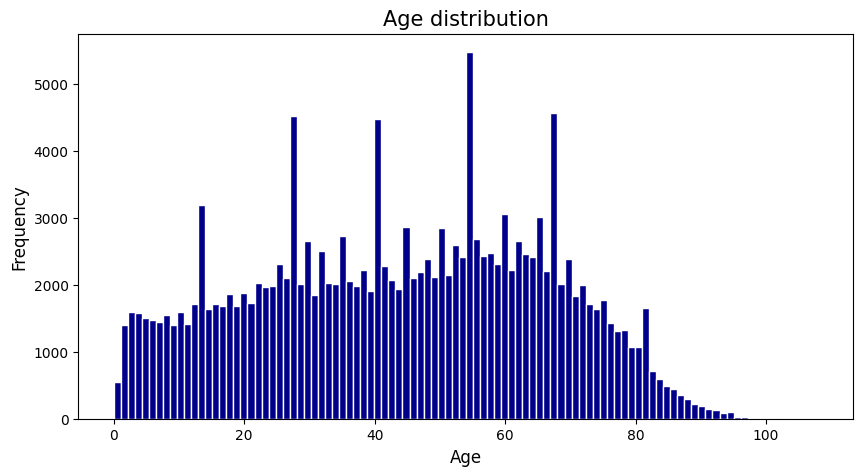

In [15]:
df.age.hist(
    bins=100,
    figsize=(10, 5),
    grid=False,
    color="darkblue",
    edgecolor="white",
    linewidth=1.0,
    xlabelsize=10,    
)
plt.title("Age distribution", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency",fontsize=12)

#### Sex

In [16]:
# rename gender to sex
df.rename({"gender": "sex"}, inplace=True, axis=1)
print(df.columns)

Index(['patient_id', 'patient_uid', 'PMID', 'file_path', 'title', 'patient',
       'age', 'sex', 'relevant_articles', 'similar_patients'],
      dtype='object')


<Axes: title={'center': 'Occurences of sex'}, xlabel='sex', ylabel='Frequency'>

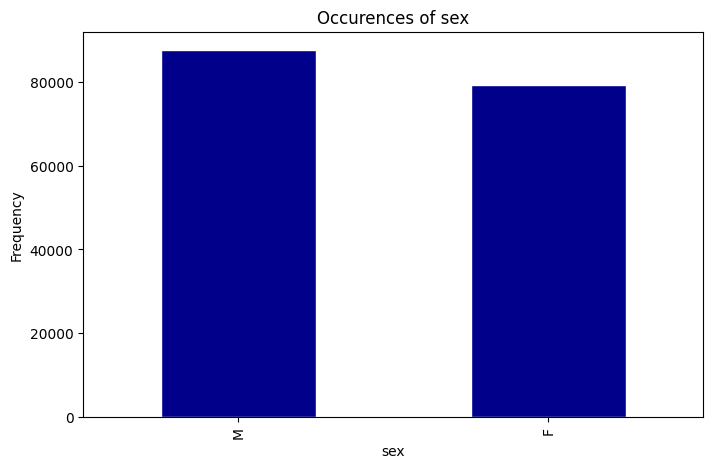

In [17]:
# plot sex distribution (occurences) using matplotlib (pandas)


df.sex.value_counts().to_frame().plot.bar(
    figsize=(8, 5),
    color="darkblue",
    edgecolor="white",
    linewidth=1.0,
    legend=False,
    grid=False,
    ylabel="Frequency",
    title="Occurences of sex",
)

We can see that the dataset is quite balanced. We will keep it as it is.

### Similar patients

In [18]:
# with this we can see that there are some patients that have no similar patients
df.similar_patients = df.similar_patients.apply(lambda x: len(x)).astype(int)

Text(0, 0.5, 'Frequency')

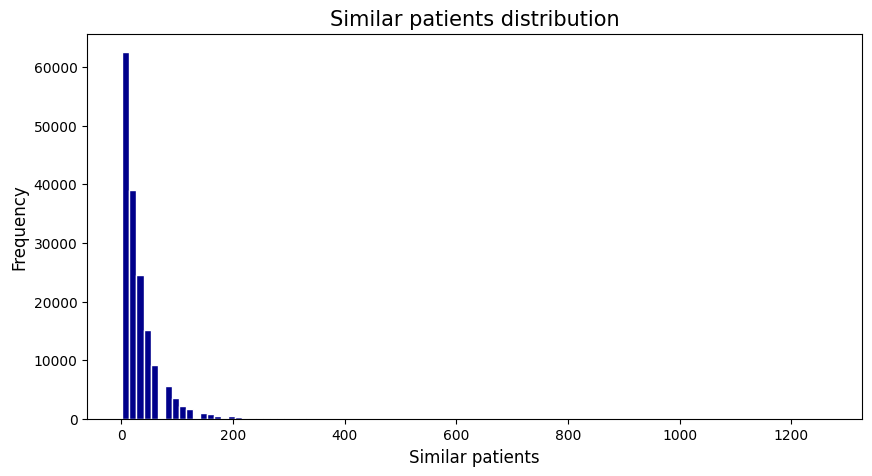

In [19]:
df.similar_patients.hist(
    bins=100,
    figsize=(10, 5),
    grid=False,
    color="darkblue",
    edgecolor="white",
    linewidth=1.0,
    xlabelsize=10,    
)
plt.title("Similar patients distribution", fontsize=15)
plt.xlabel("Similar patients", fontsize=12)
plt.ylabel("Frequency",fontsize=12)

#### Null Values

Now, we look at the distribution of the data including NA values. In this step we will also remove the columns that we don't need.

In [20]:
# title	patient	age	gender similar_patients
df.drop(columns=["file_path", "patient_id", "patient_uid", "relevant_articles"], inplace=True)

In [21]:
df.head()

,PMID,title,patient,age,sex,similar_patients
0,33492400,Early Physical Therapist Interventions for Pat...,This 60-year-old male was hospitalized due to ...,60.0,M,162
1,33492400,Early Physical Therapist Interventions for Pat...,A 39-year-old man was hospitalized due to an i...,39.0,M,162
2,33492400,Early Physical Therapist Interventions for Pat...,One week after a positive COVID-19 result this...,57.0,M,162
3,33492400,Early Physical Therapist Interventions for Pat...,This 69-year-old male was admitted to the ICU ...,69.0,M,162
4,33492400,Early Physical Therapist Interventions for Pat...,This 57-year-old male was admitted to the ICU ...,57.0,M,162


Let's look at the missing values:

In [25]:
df.isna().sum()

patient_id           0
patient_uid          0
PMID                 0
file_path            0
title                0
patient              0
age                  0
gender               0
relevant_articles    0
similar_patients     0
dtype: int64

There are none.

#### Duplicate Values

Next, we see if there are any duplicates.

In [28]:
df.duplicated().sum()

0

There are none.

The dataset is in good shape, there is nothing left to do.